🤖 LOAN PREDICTION MODEL RESULTS
Overall Accuracy: 99.88%
 Confusion Matrix saved as 'model_confusion_matrix.png'


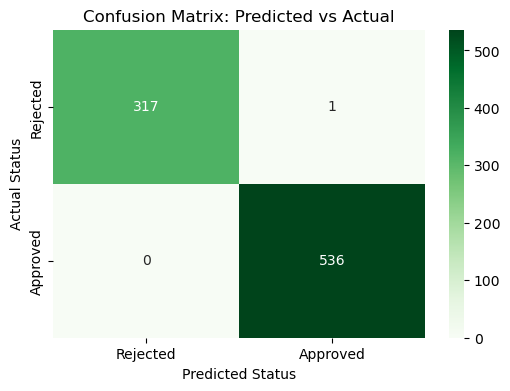

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 1. LOAD AND RE-CLEAN DATA (Ensuring 'df' exists)
df = pd.read_csv('loan_data_cleaned.csv')
df.columns = df.columns.str.strip()
for col in df.select_dtypes('object').columns:
    df[col] = df[col].str.strip()

# Create the target variable
df['loan_status_encoded'] = df['loan_status'].map({'Approved': 1, 'Rejected': 0})

# 2. PREPARE FEATURES (X) AND TARGET (y)
# We drop non-numeric columns and columns we created for analysis
X = df.drop(['loan_id', 'loan_status', 'loan_status_encoded'], axis=1, errors='ignore')

# Convert text columns (Education, Self_Employed) into 0s and 1s automatically
X = pd.get_dummies(X, drop_first=True) 

y = df['loan_status_encoded']

# 3. SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. TRAIN THE MODEL
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. EVALUATE
y_pred = model.predict(X_test)

print("🤖 LOAN PREDICTION MODEL RESULTS")
print("="*40)
print(f"Overall Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")

# 6. VISUALIZE CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Rejected', 'Approved'], 
            yticklabels=['Rejected', 'Approved'])
plt.title('Confusion Matrix: Predicted vs Actual')
plt.ylabel('Actual Status')
plt.xlabel('Predicted Status')
plt.savefig('model_confusion_matrix.png', dpi=300, bbox_inches='tight')
print(" Confusion Matrix saved as 'model_confusion_matrix.png'")
plt.show()